 A univariate kind of linear Regression has one independent variable impacting the dependent variable predict the yearly salary of people based on their years of experience

In [1]:
# Importing necessary Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
salary_data = pd.read_csv('Salary_dataset.csv')

In [3]:
# make a copy
salary_data1 = salary_data.copy()

In [4]:
# viewing our data
salary_data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [5]:
# checking info about the data
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
#checking first top rows
salary_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
# checking for null values
salary_data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [8]:
# Dropping unnamed column
salary_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [9]:
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [10]:
# checking for nan and blanks in YearsExperience
salary_data['YearsExperience'].unique()

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.8,  4. ,  4.1,
        4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,  8. ,  8.3,
        8.8,  9.1,  9.6,  9.7, 10.4, 10.6])

In [11]:
# casting datatype from string to float
salary_data['YearsExperience'] = pd.to_numeric(salary_data['YearsExperience'])

In [12]:
# describing the dataset in vertical orientation
salary_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [13]:
# describing the dataset in horizontal orientation
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


Exploratory Data Analysis using Seaborn

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

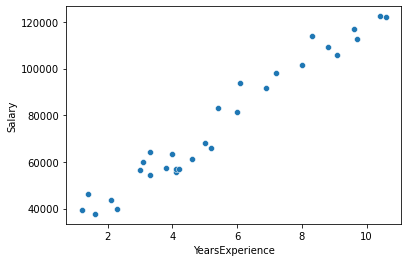

In [14]:
sns.scatterplot(data = salary_data, x='YearsExperience', y='Salary')
# no outliers or scattered points around the graph
# both variables have positive corelation as YearsExperience increases, Salary also Increases

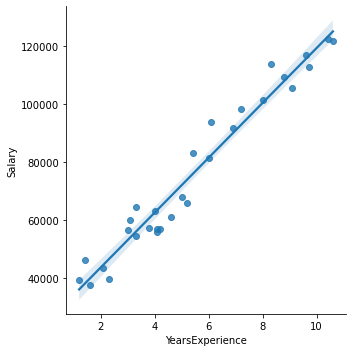

In [15]:
sns.lmplot(data=salary_data, x="YearsExperience", y="Salary")
# no outlier or scattered points with high distance resulting to inaccurate results

<AxesSubplot:>

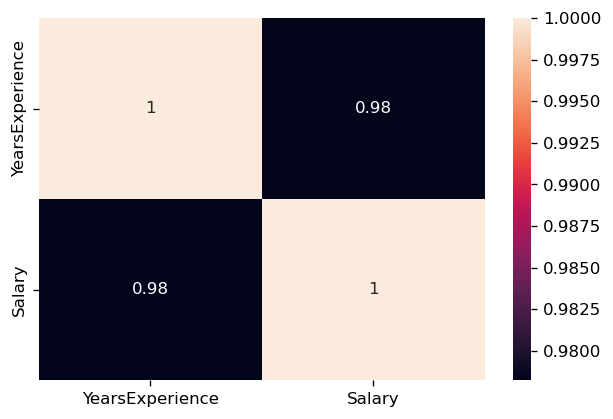

In [16]:
plt.figure(dpi=120) # size
sns.heatmap(salary_data.corr(), annot = True) # diagram
# YearsExperience and Salary have a positive correlation of 0.98

Building our Model

In [17]:
# Splitting the dataset to independent variable X and target or dependent variable Y
X = salary_data.drop('Salary', axis = 1)
y = salary_data['Salary']

In [18]:
# Splitting the dataset X and y to training and testing data
# X to X_train, X_test and y to y_train, y_test
# 0.3 test size means 0.7 percent for training and 0.3 percent for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 55 )

In [19]:
X_train.head()

,YearsExperience
17,5.4
20,6.9
28,10.4
21,7.2
24,8.8


In [20]:
X_test.head()

,YearsExperience
4,2.3
11,4.1
19,6.1
2,1.6
18,6.0


In [21]:
y_train.head()

17     83089.0
20     91739.0
28    122392.0
21     98274.0
24    109432.0
Name: Salary, dtype: float64

In [22]:
y_test.head()

4     39892.0
11    55795.0
19    93941.0
2     37732.0
18    81364.0
Name: Salary, dtype: float64

Encoding the target variable Y

In [23]:
# Label Encoding will transform target categorical variables of yes, no , maybe to numerical variables of 0,1,2
# one hot encoding works only with 0 and 1, for red, yellow, blue transform red to 1,0,0 yellow to 0,1,0 and blue to 0,0,1

Scaling dependent variable X

In [24]:
# Scaling the dataset to fit between 0-1 or 0-100
my_scaler = MinMaxScaler() # instantiate the scaler
X_train_scaled = my_scaler.fit_transform(X_train)
X_test_scaled = my_scaler.fit_transform(X_test)


# the transformed data (X_train_scaled and X_test_scaled) is a NumPy array and does not have column names
# To preserve the column structure of the original pandas DataFrame (X_train and X_test)
# we need to convert the scaled data back into a DataFrame and reassign the column names

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [25]:
# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
# Instantiating the model
my_model = LinearRegression()

In [27]:
# fit the model on the X_train and y_train dataset
my_model.fit(X_train_scaled, y_train)

LinearRegression()

In [28]:
# predicting target value of y_pred to compare with true value y_test
y_pred = my_model.predict(X_test_scaled)

In [29]:
# testing our model performance
# Calculate the error of prediction y_pred from the true or target y_test
mean_absolute_err = mean_absolute_error(y_test, y_pred)
mean_squared_err = mean_squared_error(y_test, y_pred)

In [30]:
print(f"The mean absolute error is: {mean_absolute_err:.2f}")
print(f"The mean squared error is: {np.sqrt(mean_squared_err):.2f}")  # RMSE
print(f"The coefficient of determination is: {r2_score(y_test, y_pred):.2f}")

The mean absolute error is: 21677.20
The mean squared error is: 24960.99
The coefficient of determination is: -0.90
